In [9]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [10]:
all_df = pd.read_csv('../data/cleanLOF.csv')
X = all_df.values[:, :all_df.shape[1] - 1]
y = [1 if y == 'malware' else 0 for y in all_df.values[:, all_df.shape[1] - 1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("score on train: "+ str(knn.score(X_train, y_train)))
print("score on test: "+ str(knn.score(X_test, y_test)))

scores = cross_val_score(knn, X, y, cv=5)

print("Cross validation got %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

lr_prediction = knn.predict(X_test)
print(classification_report(lr_prediction, y_test))

score on train: 0.9962655601659751
score on test: 0.9925326695706285
Cross validation got 0.98 accuracy with a standard deviation of 0.02
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       256
           1       0.99      1.00      1.00      1351

    accuracy                           0.99      1607
   macro avg       0.99      0.98      0.99      1607
weighted avg       0.99      0.99      0.99      1607



KNN: ROC AUC=0.991


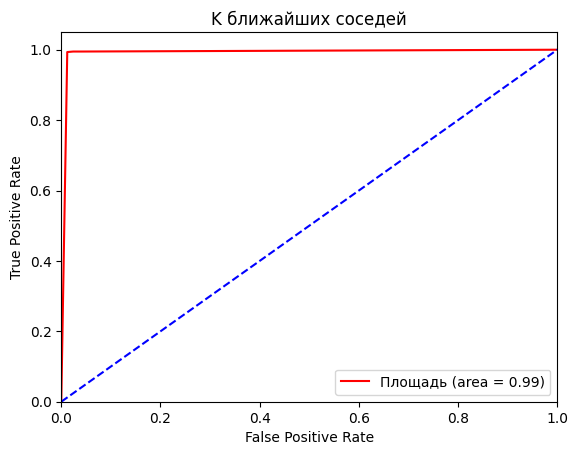

In [12]:
# получаем предказания
probs = knn.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
probs = probs[:, 1]
# рассчитываем ROC AUC
knn_auc = roc_auc_score(y_test, probs)
print('KNN: ROC AUC=%.3f' % (knn_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='red',
         label='Площадь (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K ближайших соседей')
plt.legend(loc="lower right")
plt.show()